In [10]:
import re
with open('node2vec_optim.txt', 'r') as file:
    data = file.read()

In [11]:
data = str(data)

In [12]:
data

"Number of training pairs: 1022640\nPath Lengths in train set:  [2 3 4 5 6]  Size of each length:  [389132 320865 221561  72701  18381]\nNumber of testing pairs: 109978\nPath Lengths in test set:  [2 3 4 5 6]  Size of each length:  [42666 35029 23663  6947  1673]\nNumber of nodes 4039\nNumber of edges 88234\nParams for Embeddings:  {'p': 0.25, 'q': 0.25}  with embedding type:  node2vec\nPreprocess transition probs...\n[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.\n[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.1s finished\nLearning embedding vectors...\nLearning embedding vectors done!\nEMBEDDING VECTORS SAVED\n./datasets/facebook_node2vec_p_0.25_q_0.25.npy\nEMBEDDING VECTORS SHAPE: (4039, 128)\nEmbedding method:  node2vec Binary operator: conv\nEmbedded training set size: 1022640\nEmbedded test set size: 109978\nTrain test split summary: \n Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) \n Test X shape: (109978, 2, 128, 1) T

In [17]:
param_set = "Params for Embeddings: .*'p': (?P<q>\d+\.\d+|\d+).*'q': (?P<p>\d+\.\d+|\d+)"
metrics = ".*MAE: (?P<mae>\d+\.\d+|\d+)"

In [20]:
maes_rmses= re.findall(metrics, data)
maes = [metrics for metrics in maes_rmses]
print(maes)
q_ps= re.findall(param_set, data)
ps = [params[0] for params in q_ps]
qs = [params[1] for params in q_ps]
print(len(qs), len(ps), len(maes))

['0.058229827783738565', '0.05545654585462547', '0.057656985942643076', '0.06007565149393515', '0.047936860099292586', '0.08535343432322828', '0.052792376657149614', '0.059784684209569186', '0.046145592754914616', '0.06707705177399116', '0.0442906763170816', '0.06585862627070868', '0.07196893924239393', '0.06856825910636673', '0.05760242957682445', '0.07390569022895488']
16 16 16


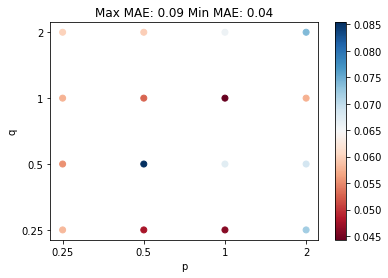

In [31]:
import matplotlib.pyplot as plt
import numpy as np

cm = plt.cm.get_cmap('RdBu')
maes_np = np.asarray(maes, dtype="float32")

sc= plt.scatter(np.array(ps), np.array(qs), c=maes_np, cmap = cm)
plt.colorbar(sc)
plt.title("Max MAE: "+ str(round(float(max(maes)), 2))+ " Min MAE: "+str(round(float(min(maes)), 2)))
plt.xlabel("p")
plt.ylabel("q")
plt.show()


In [7]:
import pandas as pd

df_dict = {"q":[], "p":[], "mae":[]}
for q,p,mae in zip(qs, ps, maes):
    df_dict["q"].append(q)
    df_dict["p"].append(p)
    df_dict["mae"].append(mae)


In [8]:
df = pd.DataFrame(df_dict)

In [9]:
df.sort_values(by="mae")

,q,p,mae
18,1.25,1.25,0.035134299587190165
7,1,0.75,0.04102638709560094
9,2,0.75,0.041981123497426755
15,0.1,1.25,0.0452908763570896
8,1.25,0.75,0.05400170943279565
0,0.1,0.1,0.05672952772372657
16,0.75,1.25,0.05952099510811253
10,0.1,1,0.06496753896233792
17,1,1.25,0.06526759897434033
14,2,1,0.0664132826565313


In [325]:
df.to_csv("results_hyperparam_search.csv")